<a href="https://colab.research.google.com/github/ArifAygun/Advanced-Pandas/blob/main/AA_Graduate_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quality Prediction of Iron Ore Mining Flotation Process - Part:1**

## **1. Problem Definition**

**Gangue concentrate predict in the reverse cationic flotation:**


Mined ores are mostly mixtures of extractable minerals and nonvaluable material (gangue). Mineral processing (e.g. ore dressing, ore beneficiation) follows mining and prepares the ore for extraction of the valuable metal. A principal step in mineral processing is physical separation of the particles of valuable minerals from the gangue, to produce an enriched portion (concentrate) containing most of the valuable minerals, and a discard (tailing) containing predominantly the gangue.

A separation of minerals by exploiting difference of surface properties (hydrophobicity) is called flotation. **The reverse cationic flotation** is commonly used to separate iron from silica. By adjusting the 'chemistry' of the pulp by adding various chemical reagents, iron minerals remain in the water and create sediment with a high concentration of iron (valuable minerals). At the same time, silica particles (gangue) attach to air bubbles and float to the surface.

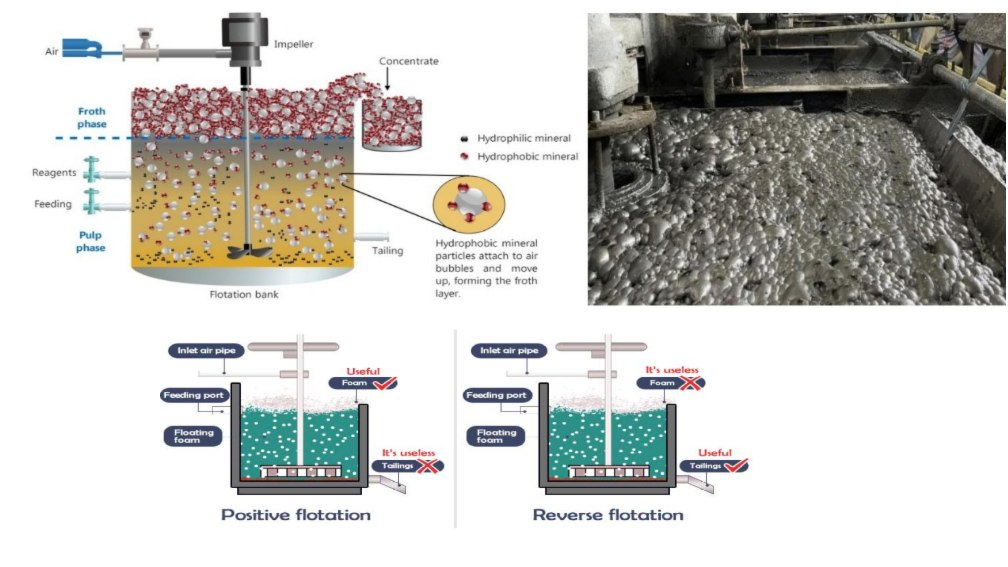

Flotation concentrate is periodically sampled to determine its purity (percentage of gangue). Higher purity in the concentrate is undesirable as it indicates that most valuable minerals had gone into the tailing. Purity measurement is usually done in a lab and can take some time before process engineers can make any adjustments based on the results. A timely investigation of concentrate purity is, therefore, a fundamental aspect for the control and optimization of the flotation process.

This project explores the application of machine learning to predict gangue (silica) concentrate in the flotation output. The prediction will help process engineers assess the purity and take corrective actions in advance.

Source of dataset: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process

##**2. Data Understanding**

###**2.1. Data Definitions**

- **Date**: Data collection time. (There is imbalance in measurement of variables)
- **% Iron Feed**: Feed grade of iron-containing ore.
- **% Silica Feed**: Feed grade of silica-containing ore.
- **Starch Flow**: Depressant chemical for Iron(Fe) containing ore measured in m³/h.
- **Amina Flow**: Collector chemical for Silica containing ore measured in m³/h.
- **Ore Pulp Flow**: The amount of pulp flow fed to the flotation columns as the product of the previous process step measured in t/h.
- **Ore Pulp pH**: pH is measured in pH scale.
- **Ore Pulp Density**: The solid percent of ore fed density ranges in kg/cm³
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Air Flow**: Air Flows that goes into the flotation cell measured in Nm³/h.
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Level**: Froth level in the flotation cell measured in mm.
- **% Iron Concentrate**: Concentrate grade of iron-containing ore in percentage.
- **% Silica Concentrate**: Concentrate grade of silica-containing ore in percentage

### **2.2. Inspection of the data**

- The first column shows time and date range (march 2017 -  september 2017). 
- Measurements are taken every 5-6 hours for the first 2 columns (input - raw material).
- Measurements are taken every 1 hour for the last 2 columns (output - raw material). 
- Some columns were sampled every 20 second. 
- The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. 
- From Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. 
- From column 9 until column 22, we can see process data (froth level and air flow inside the flotation columns, which also impact in ore quality). 
- The last two columns are the final iron ore pulp quality measurement from the lab. 

### **2.3. Aim of the project**

- To predict the percentage of output (iron and silica) concentrate in the plant output

##**3. Data Collection**

###**3.1. Import libraries and modules**

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, boxcox, mstats
from sklearn.preprocessing import MinMaxScaler
import os
import joblib
import warnings
warnings.filterwarnings("ignore")

###**3.2. Import dataset**

In [80]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Flotation/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Flotation


In [81]:
flotation = pd.read_csv('Flotation_Plant.csv')

##**4. Data Preprocessing**

###**4.1. Dataset information**

In [82]:
flotation.sample(5).T

,91203,515521,130054,151742,413051
date,2017-04-13 09:00:00,2017-07-20 15:00:00,2017-04-22 09:00:00,2017-04-27 10:00:00,2017-06-26 21:00:00
% Iron Feed,"55,6","45,6","55,17","58,05","52,14"
% Silica Feed,"13,79","29,92","14,35","11,85","18,29"
Starch Flow,"1734,86","2092,4320085167","2156,69","2665,62","4220,27"
Amina Flow,"425,821","569,7529147837","394,747","469,128","590,929"
Ore Pulp Flow,"399,182","412,8892371336","406,996","406,507","400,654"
Ore Pulp pH,"9,8451","10,6779","9,64274","9,53891","9,76259"
Ore Pulp Density,"1,65024","1,6265795294","1,53796","1,75359","1,72065"
Flotation Column 01 Air Flow,"250,747","300,202","249,692","176,3746431881","297,59"
Flotation Column 02 Air Flow,"255,728","297,362","246,62","187,6619431921","289,431"


In [83]:
flotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

###**4.2.  Correcttion of Incorrect Data**

- Ore Pulp Flow (plant input ore slury) is aproximately 400 t/h. 
- When we look the Ore Pulp Flow column most of the values with different decimal figures ("394,57" - "568848") in tons/hour
- Starch Flow and Amina Flow columns have different unbalanced values ("3019,53" - "367383" - "3121" - "1645,3466666667") in m³/hour
- Ore Pulp Density has not any problem ("1,74" - "1,78055")
- Ore Pulp pH must  be in range 0-14. But some values in thousand ("10068" - "9,95376")
- Flotation Column Air Flow values ("249.214" - "300.2481959288") in Nm³/h 
- Flotation Column Level values ("453.942" - "868.6261818182") in mm
- There is no problem in % Iron Concentrate, % Silica Concentrate columns




- Replaces any commas (",") in the values with periods (".")
- Converts the values to floats
- Rounds the values to two decimal places

In [84]:
columns_to_convert = ['% Iron Feed', '% Silica Feed', '% Iron Concentrate', 
                      '% Silica Concentrate', 'Ore Pulp Density']

for column in columns_to_convert:
    flotation[column] = flotation[column].str.replace(',', '.').astype(float).round(2)

- Remove commas from the values in the columns
- Modify the values to a decimal format by inserting a period at a specific position

In [85]:
columns_to_update = ["Starch Flow", "Amina Flow", "Ore Pulp Flow"]

flotation[columns_to_update] = (flotation[columns_to_update].replace(",", "", regex=True)
                               .apply(lambda x: x.str[:3] + "." + x.str[3:])
                               .astype(float).round(3))

- Replace commas with periods in the values of the column
- Convert the values to floats, handling cases where the values contain both commas and periods
- Round the values to 2 decimal places

In [86]:

flotation["Ore Pulp pH"] = (flotation["Ore Pulp pH"].str.replace(",", ".", regex=True)
                           .apply(lambda x: float(x[:2] + x[2:].replace(".", "")) 
                           if "," in x else float(x)).round(2))

- The values in the column are then formatted to have a specific decimal format using a lambda function applied to each value in the column.
- The lambda function checks the length of each value. If it is greater than 3, indicating that it needs decimal formatting, it splits the value into two parts: the first three characters and the remaining characters.
- The lambda function formats the two parts into a string with the integer part followed by a period and the decimal part. If the length of the value is not greater than 3, it assigns np.nan (a NaN value) to the value.

In [87]:
columns_to_update = ["Flotation Column 01 Air Flow", "Flotation Column 02 Air Flow", "Flotation Column 03 Air Flow",
                     "Flotation Column 04 Air Flow", "Flotation Column 05 Air Flow", "Flotation Column 06 Air Flow",
                     "Flotation Column 07 Air Flow"]

for column in columns_to_update:
    flotation[column] = flotation[column].str.replace(",", "")
    flotation[column] = flotation[column].apply(lambda x: "{:d}.{:s}".format(int(x[:3]), x[3:]) if len(x) > 3 else np.nan)
    flotation[column] = flotation[column].astype('float64').round(3)

In [88]:
columns_to_update = ["Flotation Column 01 Level", "Flotation Column 02 Level", "Flotation Column 03 Level",
                     "Flotation Column 04 Level", "Flotation Column 05 Level", "Flotation Column 06 Level",
                     "Flotation Column 07 Level"]

for column in columns_to_update:
    flotation[column] = flotation[column].str.replace(",", "")
    flotation[column] = flotation[column].apply(lambda x: "{:d}.{:s}".format(int(x[:3]), x[3:]) if len(x) > 3 else np.nan)
    flotation[column] = flotation[column].astype('float64').round(3)

- Calculate the mean value of the "Air Flow" and "Level" across multiple columns. 
- The mean value is calculated along the rows and rounded to three decimal places.

In [89]:

flotation['Airflow'] = flotation[["Flotation Column 01 Air Flow", "Flotation Column 02 Air Flow", 
                                  "Flotation Column 03 Air Flow", "Flotation Column 04 Air Flow", 
                                  "Flotation Column 05 Air Flow", "Flotation Column 06 Air Flow",
                                  "Flotation Column 07 Air Flow"]].mean(axis=1).round(3)

flotation.drop(["Flotation Column 01 Air Flow", "Flotation Column 02 Air Flow", 
                "Flotation Column 03 Air Flow", "Flotation Column 04 Air Flow", 
                "Flotation Column 05 Air Flow", "Flotation Column 06 Air Flow",
                "Flotation Column 07 Air Flow"], axis=1, inplace=True)

In [90]:
flotation['Level'] = flotation[["Flotation Column 01 Level", "Flotation Column 02 Level", 
                                "Flotation Column 03 Level", "Flotation Column 04 Level", 
                                "Flotation Column 05 Level", "Flotation Column 06 Level",
                                "Flotation Column 07 Level"]].mean(axis=1).round(3)

flotation.drop(["Flotation Column 01 Level", "Flotation Column 02 Level", 
                "Flotation Column 03 Level", "Flotation Column 04 Level", 
                "Flotation Column 05 Level", "Flotation Column 06 Level",
                "Flotation Column 07 Level"], axis=1, inplace=True)

In [91]:
flotation.head().T

,0,1,2,3,4
date,2017-03-10 01:00:00,2017-03-10 01:00:00,2017-03-10 01:00:00,2017-03-10 01:00:00,2017-03-10 01:00:00
% Iron Feed,55.2,55.2,55.2,55.2,55.2
% Silica Feed,16.98,16.98,16.98,16.98,16.98
Starch Flow,301.953,302.441,304.346,304.736,303.369
Amina Flow,557.434,563.965,568.054,568.665,558.167
Ore Pulp Flow,395.713,397.383,399.668,397.939,400.254
Ore Pulp pH,10.07,10.07,10.07,10.07,10.07
Ore Pulp Density,1.74,1.74,1.74,1.74,1.74
% Iron Concentrate,66.91,66.91,66.91,66.91,66.91
% Silica Concentrate,1.31,1.31,1.31,1.31,1.31


###**4.3. Check Missing & Duplicated Values**

In [92]:
missing_values = flotation.isnull().sum()
print(missing_values)

date                    0
% Iron Feed             0
% Silica Feed           0
Starch Flow             0
Amina Flow              0
Ore Pulp Flow           0
Ore Pulp pH             0
Ore Pulp Density        0
% Iron Concentrate      0
% Silica Concentrate    0
Airflow                 0
Level                   0
dtype: int64


- There are no missing values in the the dataframe

In [93]:
duplicates = flotation[flotation.duplicated()]
duplicates.count()

date                    1449
% Iron Feed             1449
% Silica Feed           1449
Starch Flow             1449
Amina Flow              1449
Ore Pulp Flow           1449
Ore Pulp pH             1449
Ore Pulp Density        1449
% Iron Concentrate      1449
% Silica Concentrate    1449
Airflow                 1449
Level                   1449
dtype: int64

In [94]:
# Count the number of duplicate rows
num_duplicates = flotation.duplicated().sum()
# Drop the duplicate rows from the DataFrame
flotation.drop_duplicates(inplace=True)
# Verify that duplicate rows have been eliminated
print("Number of duplicate rows:", num_duplicates)
print("Number of rows after removing duplicates:", len(flotation))

Number of duplicate rows: 1449
Number of rows after removing duplicates: 736004


In [95]:
flotation.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       '% Iron Concentrate', '% Silica Concentrate', 'Airflow', 'Level'],
      dtype='object')

### **4.4. Rename Columns**

In [96]:
# Rename column names
old_columns = ['date', '% Iron Feed', '% Silica Feed', 
               'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 
               'Ore Pulp pH', 'Ore Pulp Density', '% Iron Concentrate', 
               '% Silica Concentrate', 'Airflow', 'Level']

new_columns = ["date","iron_feed", "silica_feed", 
               "starch_flow", "amina_flow", "pulp_flow", 
               "pulp_pH", "pulp_density", "iron_conc", 
               "silica_conc", "airflow", "level"]

flotation = flotation.rename(columns=dict(zip(old_columns, new_columns)))
flotation.columns

Index(['date', 'iron_feed', 'silica_feed', 'starch_flow', 'amina_flow',
       'pulp_flow', 'pulp_pH', 'pulp_density', 'iron_conc', 'silica_conc',
       'airflow', 'level'],
      dtype='object')

In [97]:
flotation.sample(5).T

,63978,686580,177246,320748,344913
date,2017-04-07 02:00:00,2017-08-29 05:00:00,2017-05-03 07:00:00,2017-06-05 12:00:00,2017-06-11 03:00:00
iron_feed,55.19,56.02,59.78,64.03,64.03
silica_feed,16.82,13.51,9.29,6.26,6.26
starch_flow,747.477,233.491,721.981,452.214,421.399
amina_flow,557.946,578.458,570.319,534.89,475.551
pulp_flow,399.371,382.427,401.498,404.524,413.798
pulp_pH,9.4,8.76,9.6,9.86,10.25
pulp_density,1.76,1.73,1.78,1.65,1.68
iron_conc,65.64,62.83,64.29,66.32,64.35
silica_conc,1.64,3.95,2.71,2.06,3.1


In [98]:
flotation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736004 entries, 0 to 737452
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          736004 non-null  object 
 1   iron_feed     736004 non-null  float64
 2   silica_feed   736004 non-null  float64
 3   starch_flow   736004 non-null  float64
 4   amina_flow    736004 non-null  float64
 5   pulp_flow     736004 non-null  float64
 6   pulp_pH       736004 non-null  float64
 7   pulp_density  736004 non-null  float64
 8   iron_conc     736004 non-null  float64
 9   silica_conc   736004 non-null  float64
 10  airflow       736004 non-null  float64
 11  level         736004 non-null  float64
dtypes: float64(11), object(1)
memory usage: 73.0+ MB


### **4.5. Grouping Rows with Hourly Frequency**

The importance of considering plant data as a holistic entity was emphasized in order to gain a comprehensive understanding. To achieve this, a loop-based analysis methodology was employed. Each row of data was treated as an individual iteration, representing a complete cycle of feeding 100 tons of ore to the plant, enriching it, and concluding the process. For the purpose of this study, each cycle was set at a duration of one hour. Consequently, a photograph of the plant was captured at hourly intervals and subjected to analysis. It is worth noting that if a more frequent and regular data collection scheme were in place, such as cycles occurring every minute, it would yield a larger dataset suitable for machine learning applications.

In [99]:
flotation['date'] = pd.to_datetime(flotation['date'])
#grouping the data according to the hours and get their average values. 
flotation_grouped = flotation.groupby(pd.Grouper(key='date',freq='H')).mean()
# cycle_data.insert(0,'Date',cycle_data.index)
flotation_grouped.reset_index(inplace = True)

#some rows have 'null' values because of timing. We need to drop them 
print('Shape of Grouped Flotation Dataset = ', flotation_grouped.shape)
flotation = flotation_grouped.dropna()
print('Shape of Grouped Flotation Dataset after drop null values = ', flotation.shape);

Shape of Grouped Flotation Dataset =  (4415, 12)
Shape of Grouped Flotation Dataset after drop null values =  (4097, 12)


The grouping process has a number of advantages and disadvantages.

**Advantages:**
Each analysis will be able to do each data cycle on an hourly frequency.
Date column can be dropped. The number of columns fell to 23.
The number of rows fell to 4097 from 737453. Every rows means calculations on computer.

**Disadvantage:** The number of rows fell to 4097 from 737453. The more rows we have for machine learning, the better results we get. This large data loss will adversely affect our estimation results.

- Dropping unnecessary date column

In [100]:
flotation.drop(['date'], axis=1, inplace=True)

In [101]:
missing_values = flotation.isnull().sum()
print(missing_values)

iron_feed       0
silica_feed     0
starch_flow     0
amina_flow      0
pulp_flow       0
pulp_pH         0
pulp_density    0
iron_conc       0
silica_conc     0
airflow         0
level           0
dtype: int64


In [102]:
duplicates = flotation[flotation.duplicated()]
duplicates.count()

iron_feed       0
silica_feed     0
starch_flow     0
amina_flow      0
pulp_flow       0
pulp_pH         0
pulp_density    0
iron_conc       0
silica_conc     0
airflow         0
level           0
dtype: int64

In [103]:
flotation.to_csv('/content/drive/My Drive/Flotation/flotation_grouped.csv', index=False)

###**4.6. Corellation between the variables**

In [104]:
flotation.corr()

,iron_feed,silica_feed,starch_flow,amina_flow,pulp_flow,pulp_pH,pulp_density,iron_conc,silica_conc,airflow,level
iron_feed,1.000000,-0.971833,-0.012753,-0.096215,0.186379,0.007458,-0.136404,0.055453,-0.077114,-0.080216,0.028466
silica_feed,-0.971833,1.000000,0.029140,0.085890,-0.174834,0.008383,0.113417,-0.044189,0.072782,0.107268,-0.049391
starch_flow,-0.012753,0.029140,1.000000,0.039488,0.047801,0.230099,-0.118724,0.035205,-0.043536,0.143422,-0.097972
amina_flow,-0.096215,0.085890,0.039488,1.000000,0.237586,0.134163,0.659765,-0.120415,0.171142,0.131672,-0.324536
pulp_flow,0.186379,-0.174834,0.047801,0.237586,1.000000,0.138802,0.019916,0.096595,0.009619,-0.181273,-0.030256
pulp_pH,0.007458,0.008383,0.230099,0.134163,0.138802,1.000000,0.122639,0.197962,-0.151422,0.182103,-0.121504
pulp_density,-0.136404,0.113417,-0.118724,0.659765,0.019916,0.122639,1.000000,0.016802,0.050825,-0.023721,-0.148443
iron_conc,0.055453,-0.044189,0.035205,-0.120415,0.096595,0.197962,0.016802,1.000000,-0.801212,0.050338,0.072211
silica_conc,-0.077114,0.072782,-0.043536,0.171142,0.009619,-0.151422,0.050825,-0.801212,1.000000,-0.165113,-0.078572
airflow,-0.080216,0.107268,0.143422,0.131672,-0.181273,0.182103,-0.023721,0.050338,-0.165113,1.000000,-0.461957


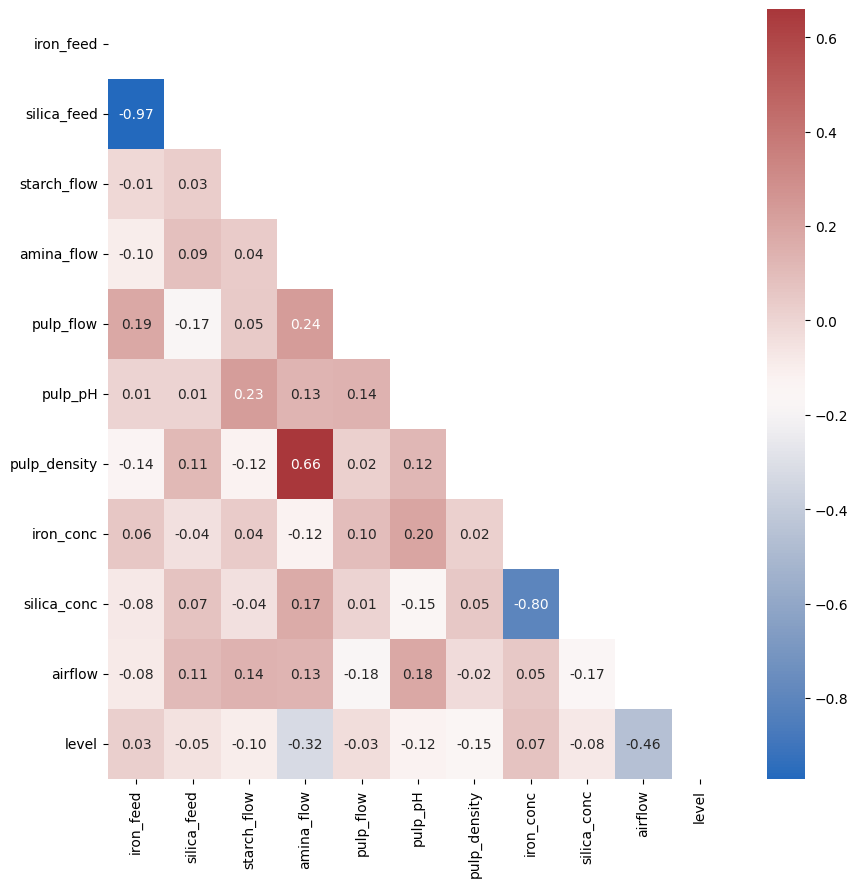

In [105]:
mask = np.triu(np.ones_like(flotation.corr(), dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(flotation.corr(), annot=True, fmt='.2f', cmap='vlag', 
            annot_kws={"fontsize": 10}, mask=mask)
plt.show()

### **4.7. Check & remove outliers**

In [106]:
flotation.columns

Index(['iron_feed', 'silica_feed', 'starch_flow', 'amina_flow', 'pulp_flow',
       'pulp_pH', 'pulp_density', 'iron_conc', 'silica_conc', 'airflow',
       'level'],
      dtype='object')

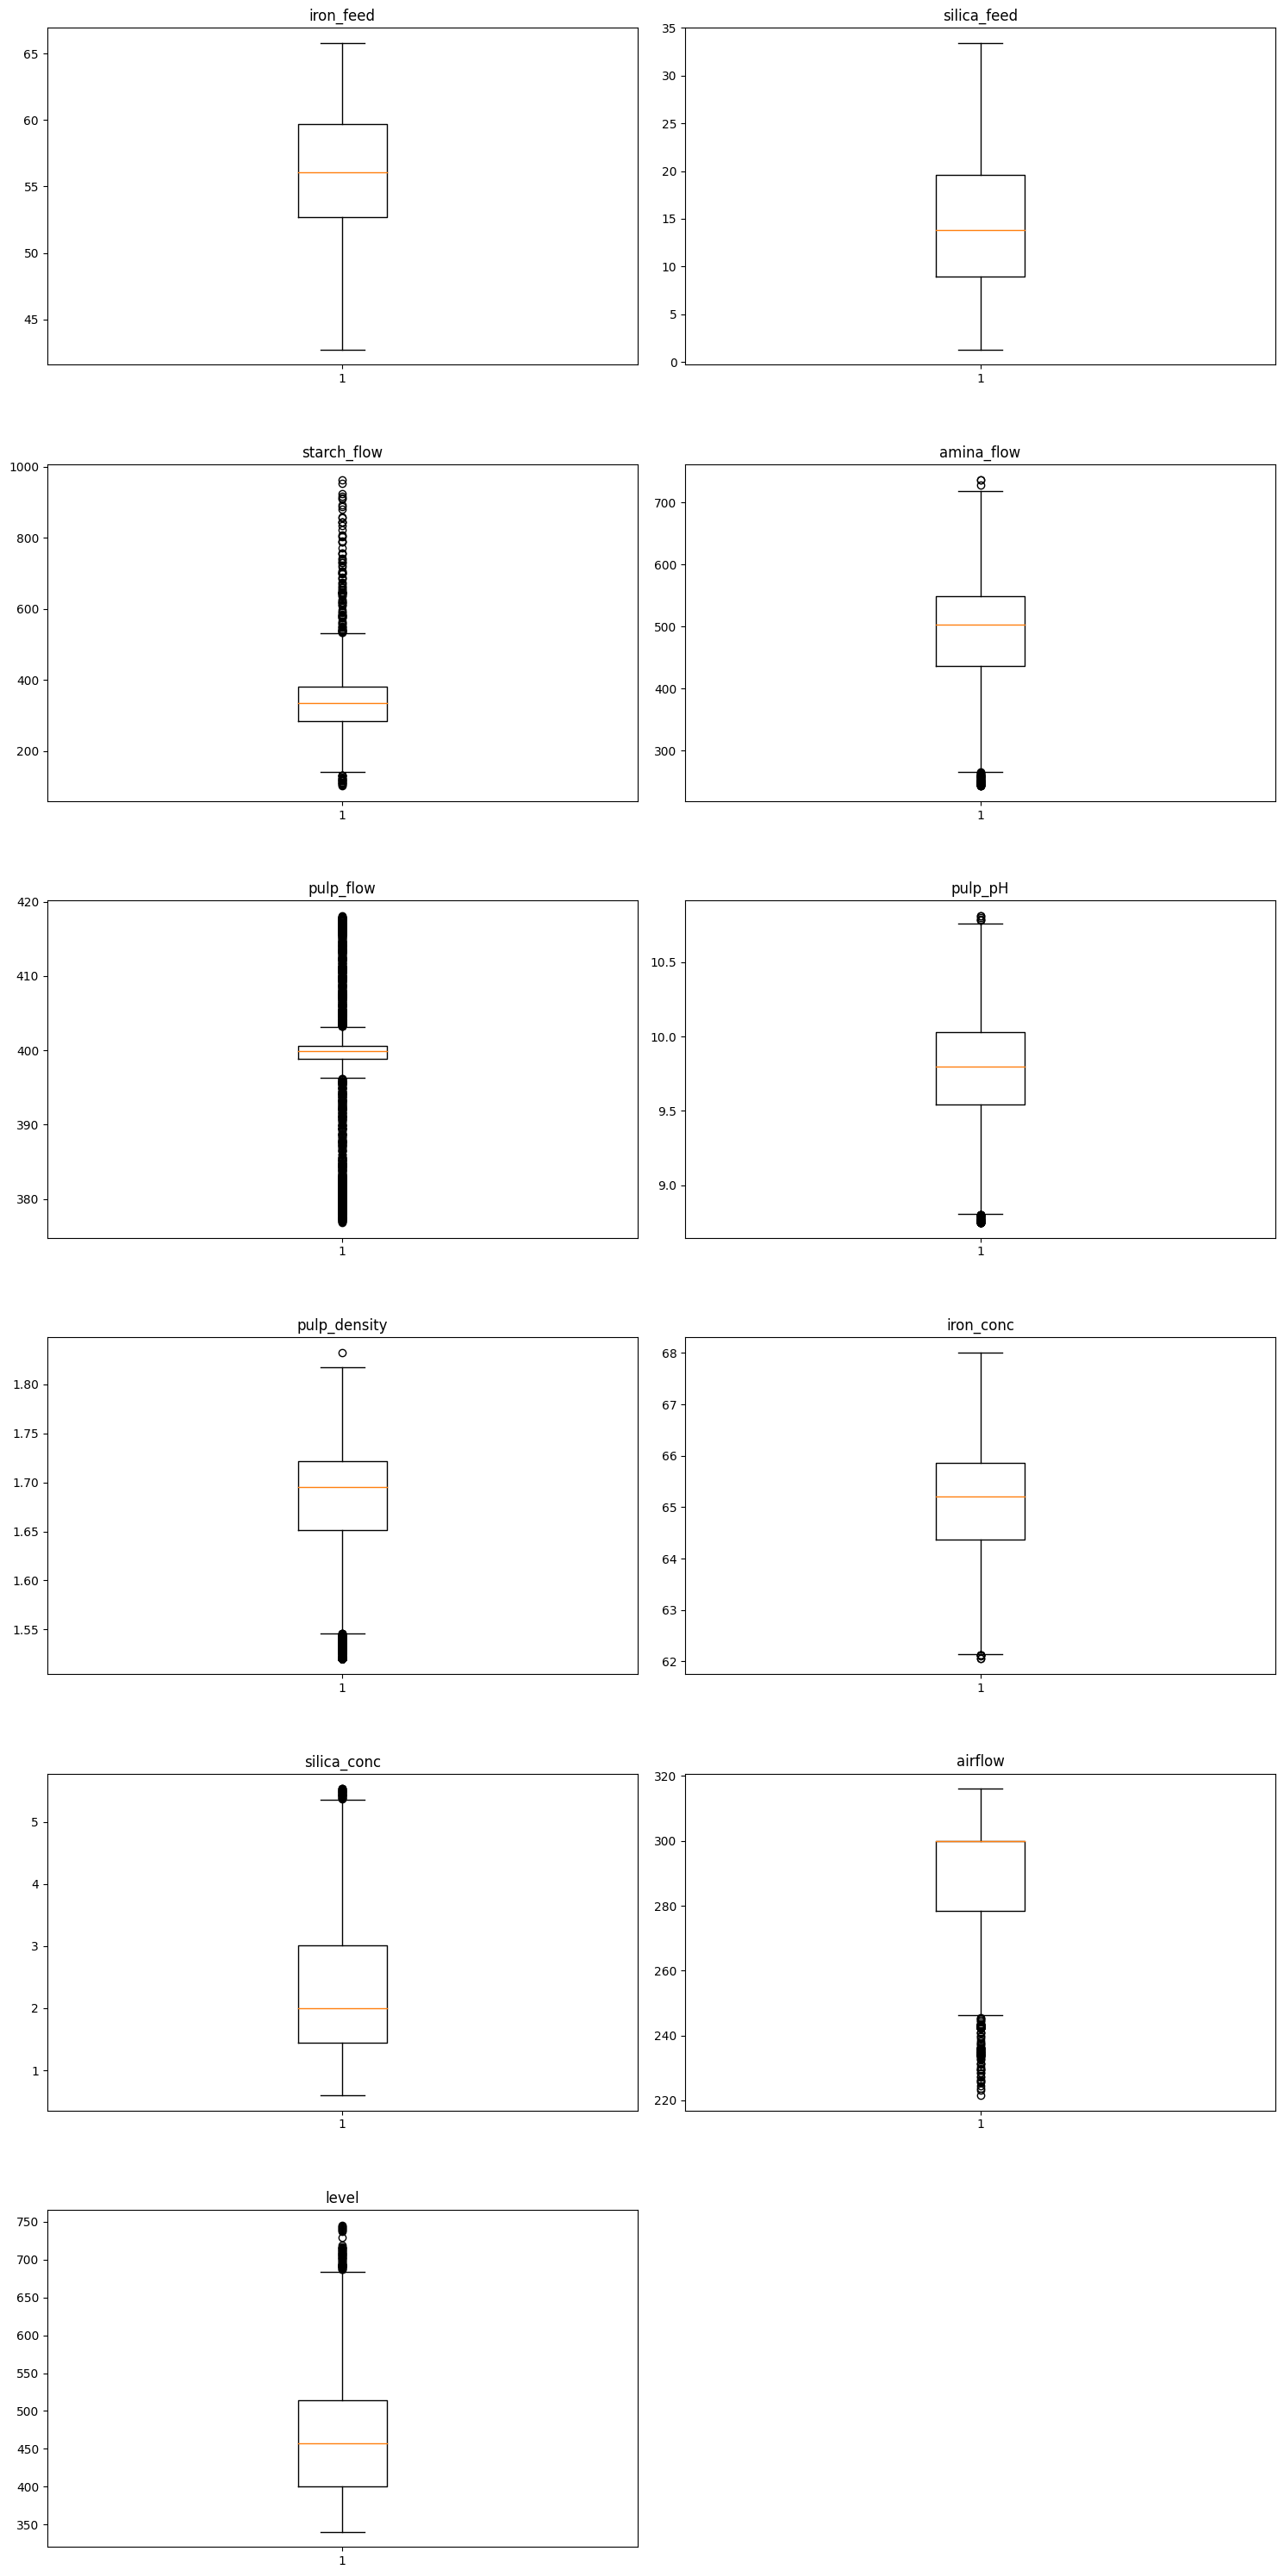

In [107]:
variables = ['iron_feed', 'silica_feed', 'starch_flow', 
             'amina_flow', 'pulp_flow', 'pulp_pH', 
             'pulp_density', 'iron_conc', 'silica_conc', 
             'airflow', 'level']

num_rows = (len(variables) + 1) // 2 
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, 
                         figsize=(15, num_rows * 5))

axes = axes.flatten()

for i, variable in enumerate(variables):
    data = flotation[variable]
    axes[i].boxplot(data)
    axes[i].set_title(variable)

for j in range(len(variables), 
               num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout(h_pad=5)
plt.show()

In [108]:
from scipy.stats import mstats
from scipy.stats.mstats import winsorize

variables = ['starch_flow', 'amina_flow', 'pulp_flow',
             'pulp_pH', 'pulp_density', 
             'iron_conc', 'silica_conc']

limits = {'starch_flow': [0.01, 0.03],
          'amina_flow': [0.03, 0.01],
          'pulp_flow': [0.2, 0.1],
          'pulp_pH': [0.05, 0.05],
          'pulp_density': [0.1, 0.01],
          'iron_conc': [0.01, 0.01],
          'silica_conc': [0.01, 0.02],
          'airflow': [0.5, 0.2],
          'level': [0.2, 0.5],}

for variable in variables:
    data = flotation[variable]
    limit = limits[variable]
    data_winsorized = winsorize(data, limits=limit)
    flotation[variable] = data_winsorized

###**4.8. Check & remove skewness**

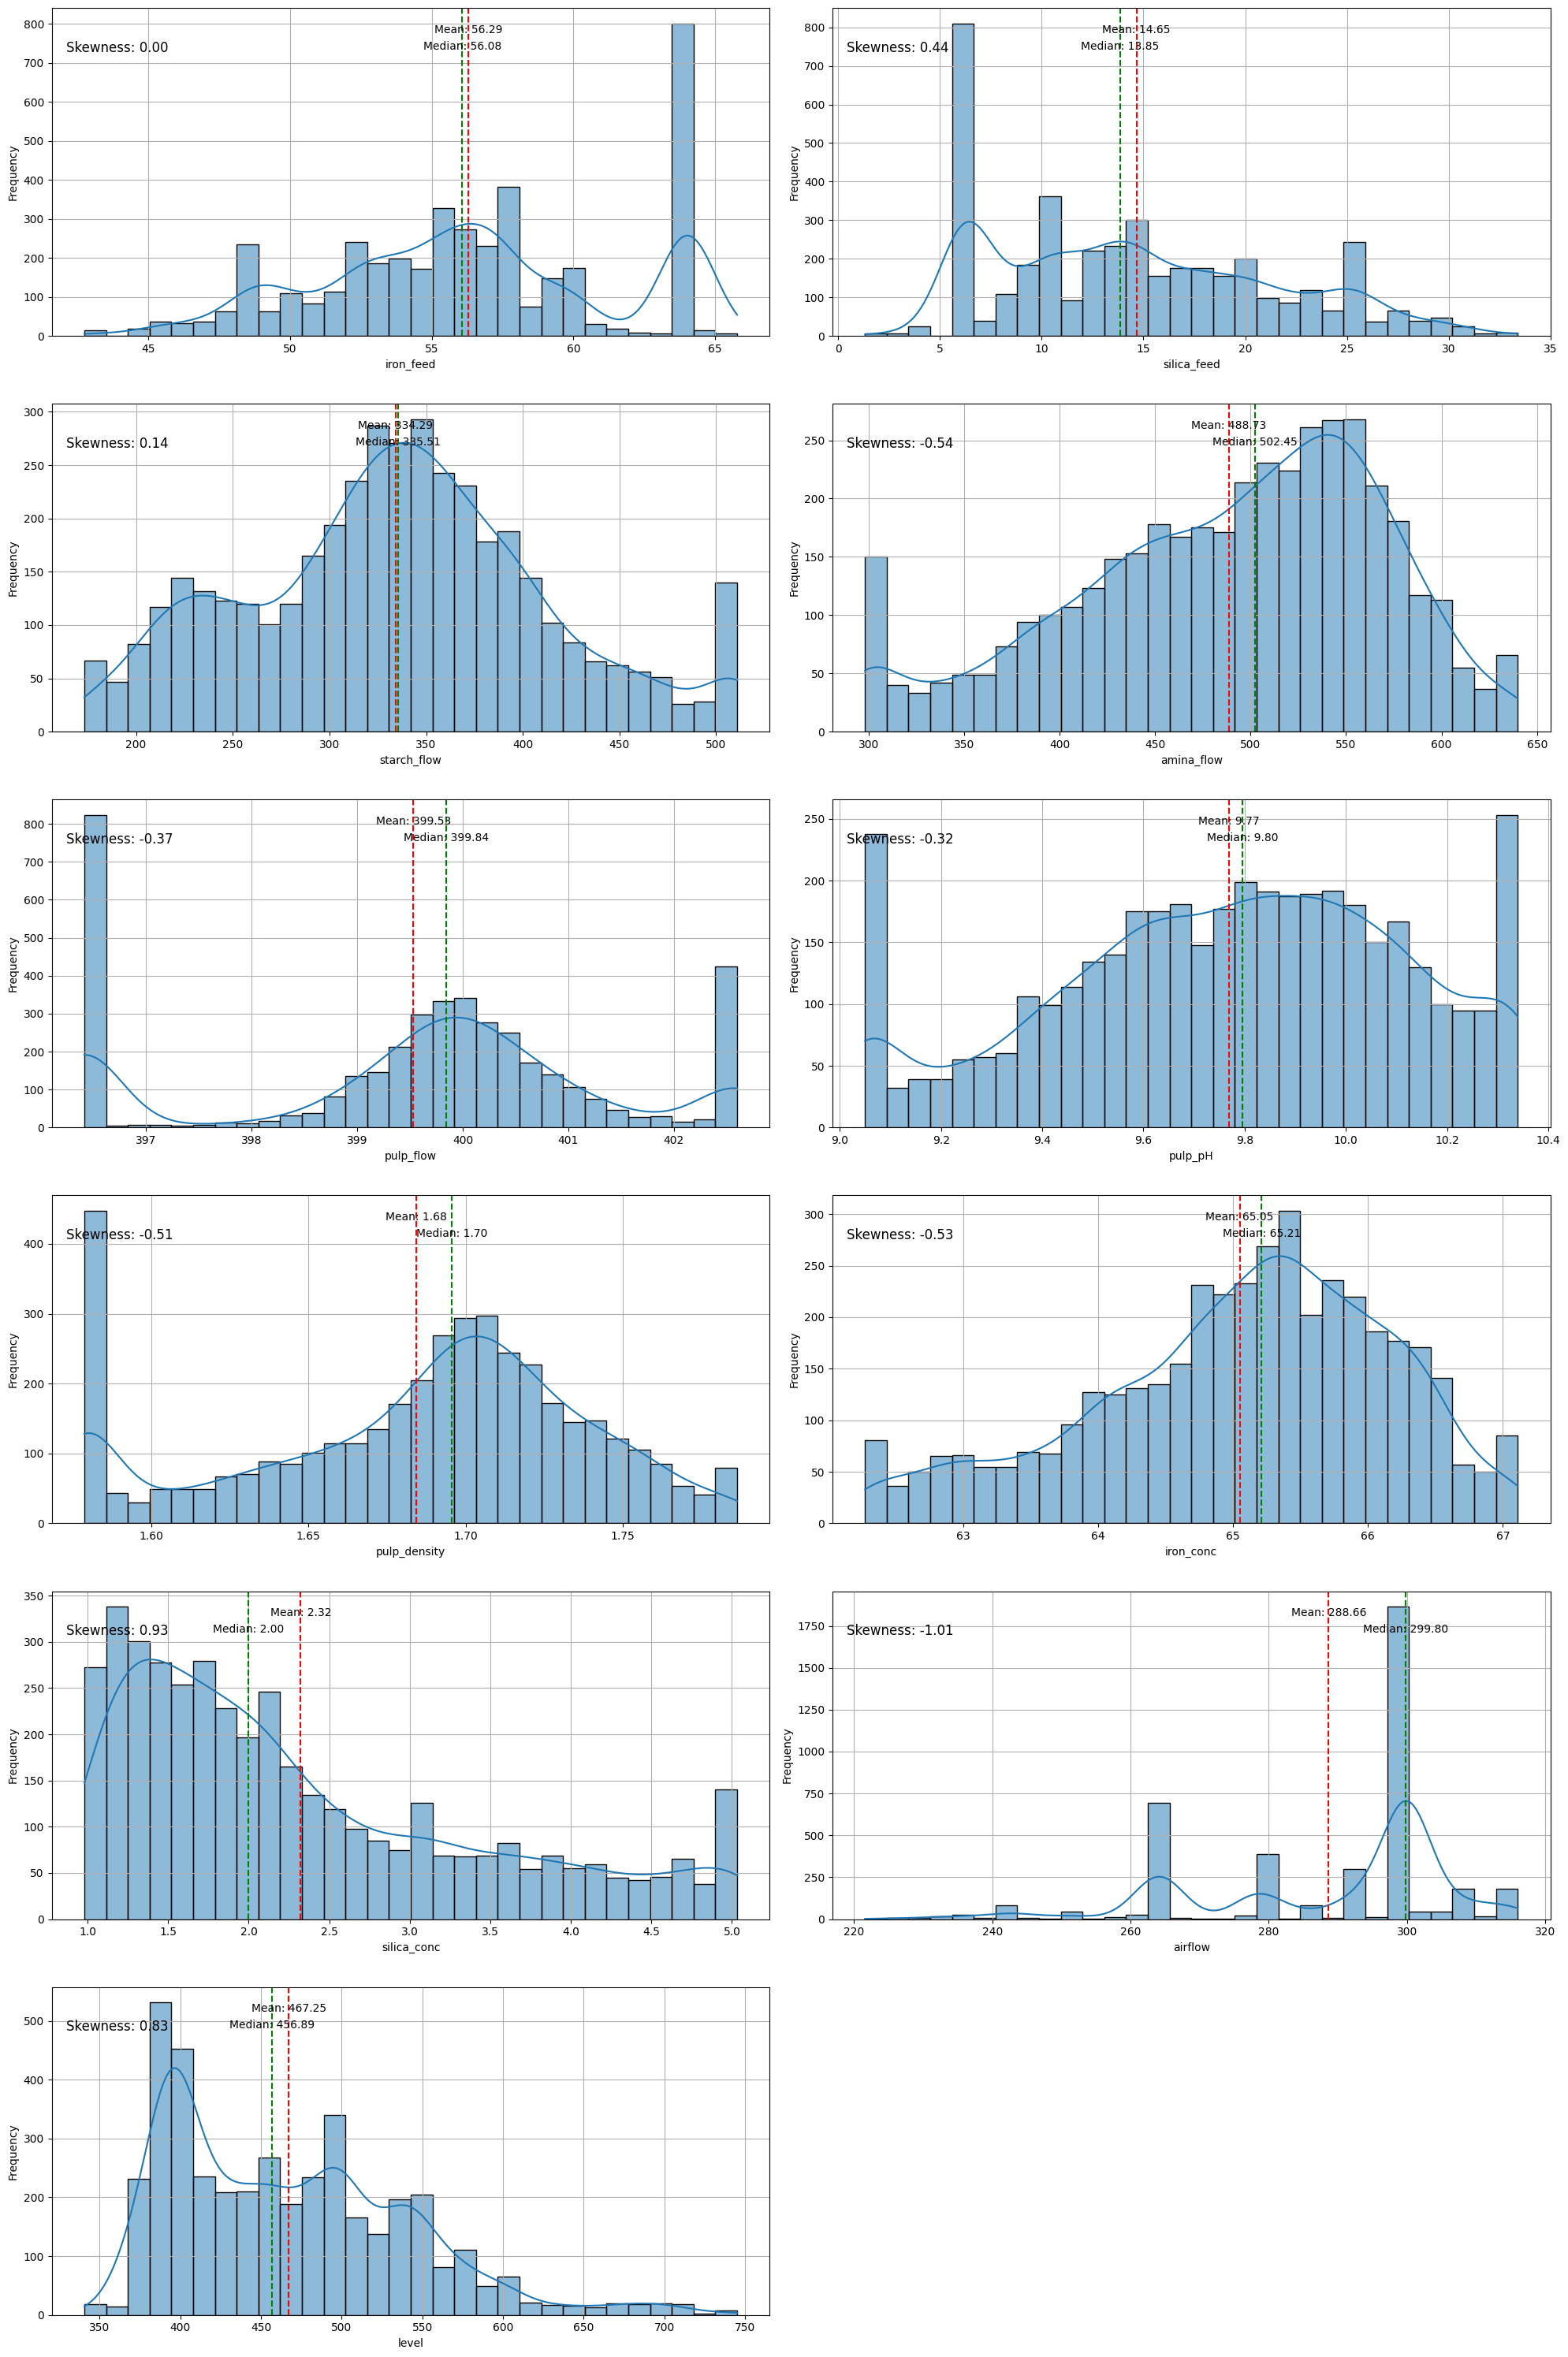

In [116]:
import seaborn as sns
from scipy.stats import skew

variables = ['iron_feed', 'silica_feed', 'starch_flow', 
             'amina_flow', 'pulp_flow', 'pulp_pH', 
             'pulp_density', 'iron_conc', 'silica_conc', 
             'airflow', 'level']

num_vars = len(variables)
num_rows = (num_vars + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))

for i, variable in enumerate(variables):
    # Select a specific column for skewness calculation
    data = flotation[variable].to_numpy()
    # Calculate the skewness degree
    skewness = skew(data)
    # Determine the subplot position
    row = i // 2
    col = i % 2
    # Plotting the variable using sns.histplot
    sns.histplot(data, ax=axes[row, col], bins=30, kde=True)
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].axvline(np.mean(data), color='r', linestyle='--')
    axes[row, col].axvline(np.median(data), color='g', linestyle='--')
    # Display the skewness degree in the plot frame
    axes[row, col].text(0.02, 0.9, f"Skewness: {skewness:.2f}",
                        transform=axes[row, col].transAxes, 
                        fontsize=12, verticalalignment='top')
    # Display the mean and median values
    ylim = axes[row, col].get_ylim()
    y_range = ylim[1] - ylim[0]
    axes[row, col].text(np.mean(data), ylim[1] - 0.05 * y_range,
                        f"Mean: {np.mean(data):.2f}", color='black', fontsize=10,
                        verticalalignment='top', horizontalalignment='center')
    axes[row, col].text(np.median(data), ylim[1] - 0.1 * y_range,
                        f"Median: {np.median(data):.2f}", color='black', fontsize=10,
                        verticalalignment='top', horizontalalignment='center')
    axes[row, col].grid(True)

if num_vars % 2 != 0:
    axes[num_rows - 1, 1].axis('off')

plt.tight_layout(h_pad=3)
plt.show()


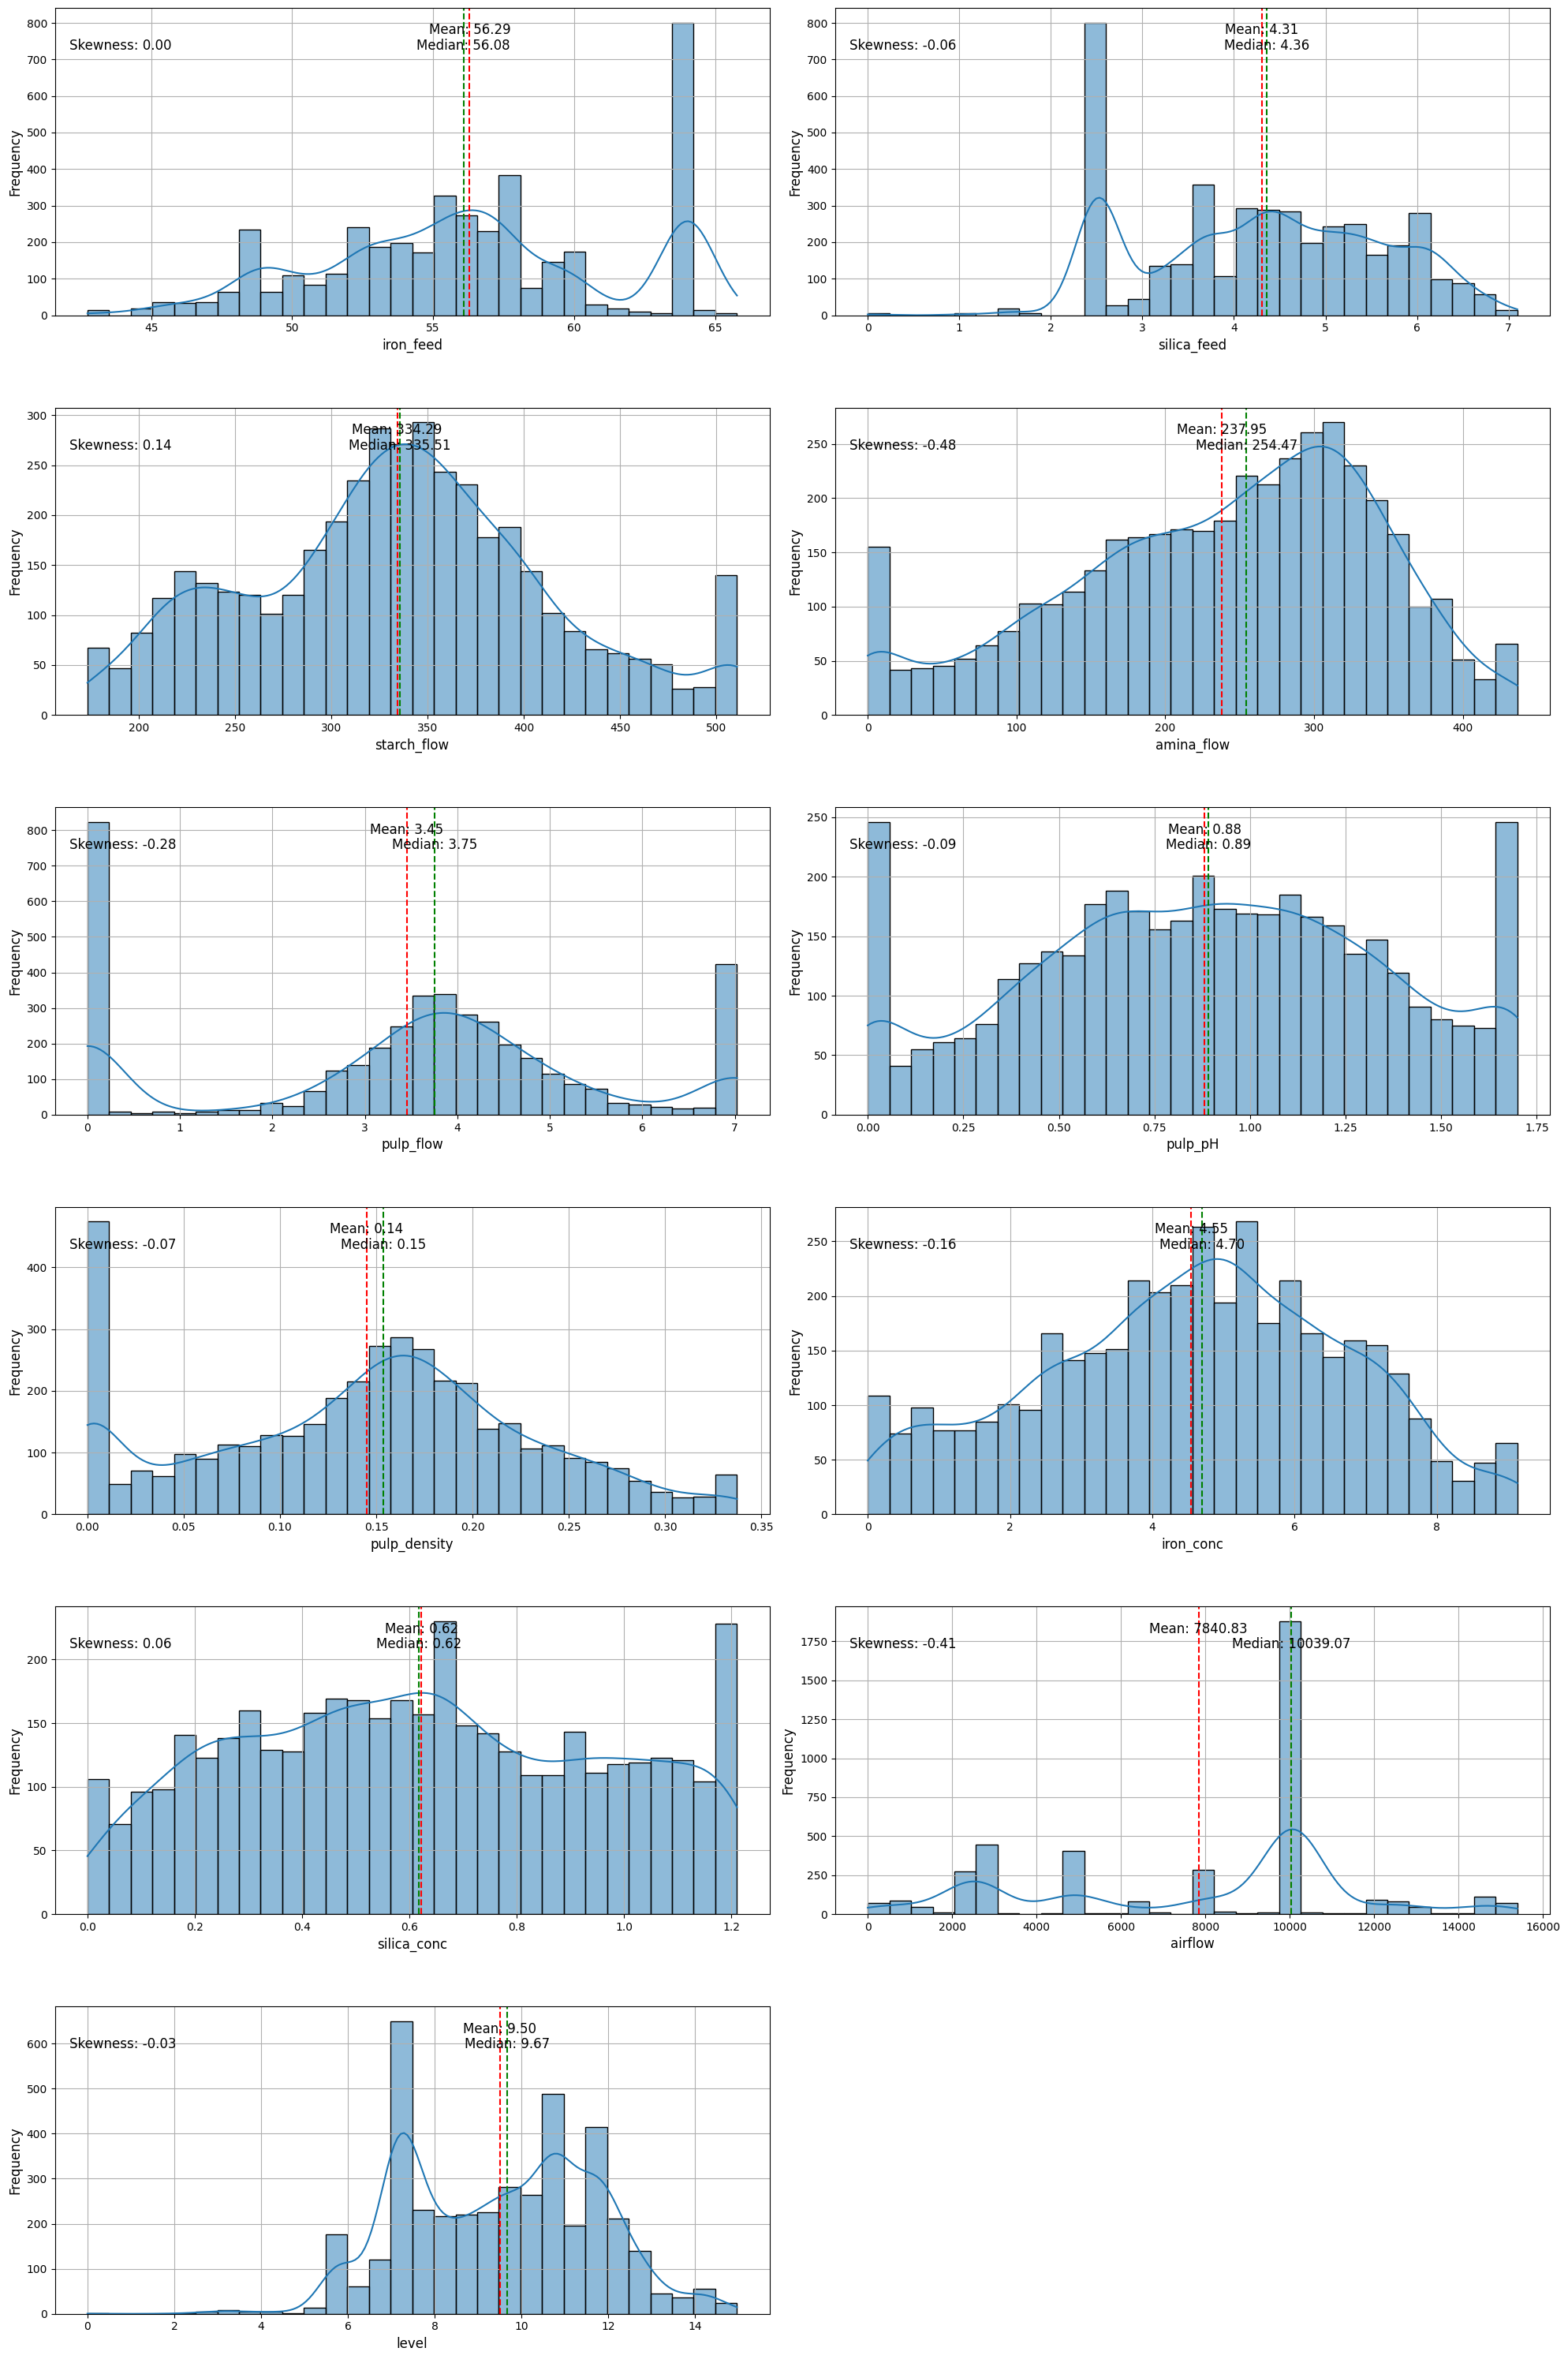

In [117]:
import seaborn as sns
from scipy.stats import skew, boxcox

variables = ['iron_feed', 'silica_feed', 'starch_flow', 
             'amina_flow', 'pulp_flow', 'pulp_pH', 
             'pulp_density', 'iron_conc', 'silica_conc', 
             'airflow', 'level']

num_vars = len(variables)
num_rows = (num_vars + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))

for i, variable in enumerate(variables):
    # Select a specific column for skewness calculation
    data = flotation[variable].to_numpy()
    # Calculate the skewness degree
    skewness = skew(data)

    # Apply Box-Cox transformation if skewness is greater than 0.2
    if abs(skewness) > 0.2:
        # Add a shift to make the data positive
        data_shifted = data - np.min(data) + 1
        data_transformed, _ = boxcox(data_shifted)
    else:
        data_transformed = data

    row = i // 2
    col = i % 2

    # Plotting the variable using sns.histplot
    sns.histplot(data_transformed, ax=axes[row, col], bins=30, kde=True)
    axes[row, col].set_xlabel(variable, fontsize=12)
    axes[row, col].set_ylabel("Frequency", fontsize=12)
    axes[row, col].axvline(np.mean(data_transformed), color='r', linestyle='--')
    axes[row, col].axvline(np.median(data_transformed), color='g', linestyle='--')

    # Display the skewness degree in the plot frame
    axes[row, col].text(0.02, 0.9, f"Skewness: {skew(data_transformed):.2f}",
                        transform=axes[row, col].transAxes,
                        fontsize=12, verticalalignment='top')

    mean_label_ypos = axes[row, col].get_ylim()[1] * 0.95
    axes[row, col].text(np.mean(data_transformed), mean_label_ypos, f"Mean: {np.mean(data_transformed):.2f}",
                        color='black', fontsize=12, verticalalignment='top', horizontalalignment='center')

    median_label_ypos = axes[row, col].get_ylim()[1] * 0.90
    axes[row, col].text(np.median(data_transformed), median_label_ypos, f"Median: {np.median(data_transformed):.2f}",
                        color='black', fontsize=12, verticalalignment='top', horizontalalignment='center')

    axes[row, col].grid(True)

if num_vars % 2 != 0:
    axes[num_rows - 1, 1].axis('off')

plt.tight_layout(h_pad=5)
plt.show()

In [112]:
flotation.sample(5).T

,3290,1347,3101,3141,3785
iron_feed,57.460000,53.940000,56.760000,59.200000,48.810000
silica_feed,10.800000,17.420000,13.340000,9.140000,25.310000
starch_flow,420.094028,436.120650,416.210172,390.235156,316.216628
amina_flow,544.016972,483.561844,406.060644,452.062411,417.944556
pulp_flow,400.155894,402.598967,400.218961,400.101850,396.415517
pulp_pH,10.339611,10.100500,9.980222,10.249389,9.653944
pulp_density,1.714056,1.594944,1.697667,1.713444,1.724222
iron_conc,65.930000,64.100000,64.560000,65.950000,64.980000
silica_conc,1.540000,4.502000,2.010000,2.070000,2.640000
airflow,276.130322,278.365428,262.996872,278.528189,315.541044


In [113]:
flotation.describe().T

,count,mean,std,min,25%,50%,75%,max
iron_feed,4097.0,56.294730,5.158347,42.740000,52.670000,56.080000,59.720000,65.780000
silica_feed,4097.0,14.651733,6.808236,1.310000,8.940000,13.850000,19.600000,33.400000
starch_flow,4097.0,334.289619,77.415017,173.275472,283.586733,335.505333,382.469011,510.855333
amina_flow,4097.0,488.732951,80.642046,298.186094,436.037967,502.454283,549.522256,639.905994
pulp_flow,4097.0,399.532194,1.882132,396.415517,398.848778,399.841022,400.582233,402.598967
pulp_pH,4097.0,9.769015,0.346795,9.049778,9.540889,9.795944,10.030944,10.339611
pulp_density,4097.0,1.684252,0.055033,1.578778,1.651389,1.695722,1.721722,1.786389
iron_conc,4097.0,65.048787,1.111449,62.270000,64.370000,65.210000,65.860000,67.110000
silica_conc,4097.0,2.322990,1.111360,0.980000,1.440000,2.000000,3.010000,5.032444
airflow,4097.0,288.656648,18.520292,221.601528,278.442433,299.804678,299.975556,316.005211


### **4.9. Reorder the columns**

In [114]:
column_order = ['iron_feed', 'silica_feed', 'starch_flow', 'amina_flow', 'pulp_flow', 'pulp_pH',
                'pulp_density', 'airflow', 'level', 'iron_conc', 'silica_conc']

flotation = flotation.reindex(columns=column_order)
flotation.columns

Index(['iron_feed', 'silica_feed', 'starch_flow', 'amina_flow', 'pulp_flow',
       'pulp_pH', 'pulp_density', 'airflow', 'level', 'iron_conc',
       'silica_conc'],
      dtype='object')

###**4.10. Save manipulated dataset to new file**

In [115]:
flotation.to_csv('/content/drive/My Drive/Flotation/flotation_manipulated.csv', index=False)